# import Library




In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
#import efficientnet.tfkeras as efn
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.style.use('ggplot')

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.keras.applications import DenseNet169

In [ ]:
densenet169_conv = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in densenet169_conv.layers:
    layer.trainable = True

for layer in densenet169_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(densenet169_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(13, activation='softmax'))

51888128/51877672 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f5ebda43750> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5ebc71dc50> True
<keras.layers.convolutional.Conv2D object at 0x7f5ebca53850> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5ebc71d690> True
<keras.layers.core.activation.Activation object at 0x7f5ebc812d10> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5eb02a8e90> True
<keras.layers.pooling.MaxPooling2D object at 0x7f5eb0280a10> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5eb0285e50> True
<keras.layers.core.activation.Activation object at 0x7f5eb028b890> True
<keras.layers.convolutional.Conv2D object at 0x7f5eb0285f10> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5eb0295b50> True
<keras.layers.core.activation.Activation object at 0x7f5eb0225b90> True
<keras.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 512)               41746944  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

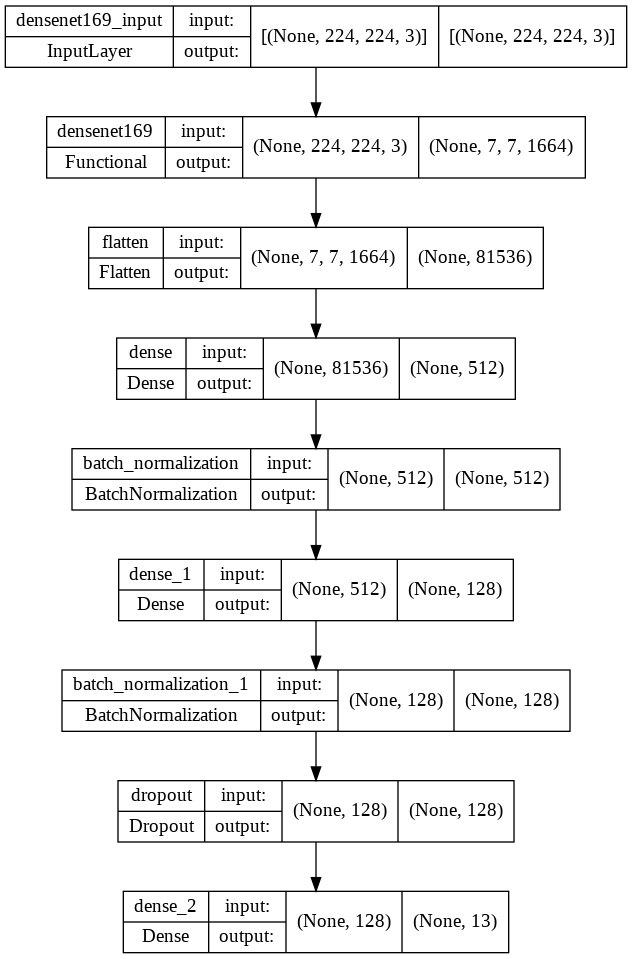

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [ ]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=10, verbose=1, validation_data=(test_set))

Epoch 1/10
331/331 [==============================] - 8912s 27s/step - loss: 0.7704 - accuracy: 0.7747 - val_loss: 0.6632 - val_accuracy: 0.8250
Epoch 2/10
331/331 [==============================] - 180s 543ms/step - loss: 0.3214 - accuracy: 0.9027 - val_loss: 0.4530 - val_accuracy: 0.8703
Epoch 3/10
331/331 [==============================] - 178s 537ms/step - loss: 0.1995 - accuracy: 0.9396 - val_loss: 0.4347 - val_accuracy: 0.8818
Epoch 4/10
331/331 [==============================] - 178s 538ms/step - loss: 0.1402 - accuracy: 0.9599 - val_loss: 0.4614 - val_accuracy: 0.8841
Epoch 5/10
331/331 [==============================] - 182s 548ms/step - loss: 0.1191 - accuracy: 0.9651 - val_loss: 0.3894 - val_accuracy: 0.8933
Epoch 6/10
331/331 [==============================] - 180s 542ms/step - loss: 0.0906 - accuracy: 0.9730 - val_loss: 0.3950 - val_accuracy: 0.8964
Epoch 7/10
331/331 [==============================] - 182s 549ms/step - loss: 0.0806 - accuracy: 0.9772 - val_loss: 0.4389 - 

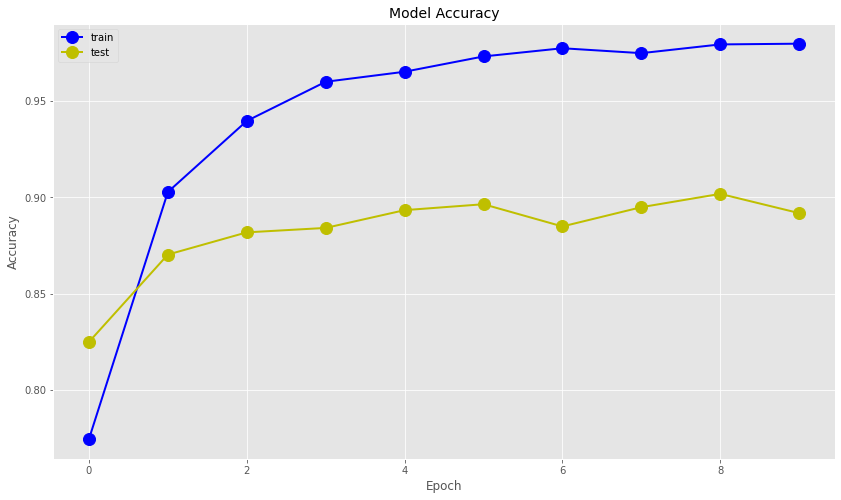

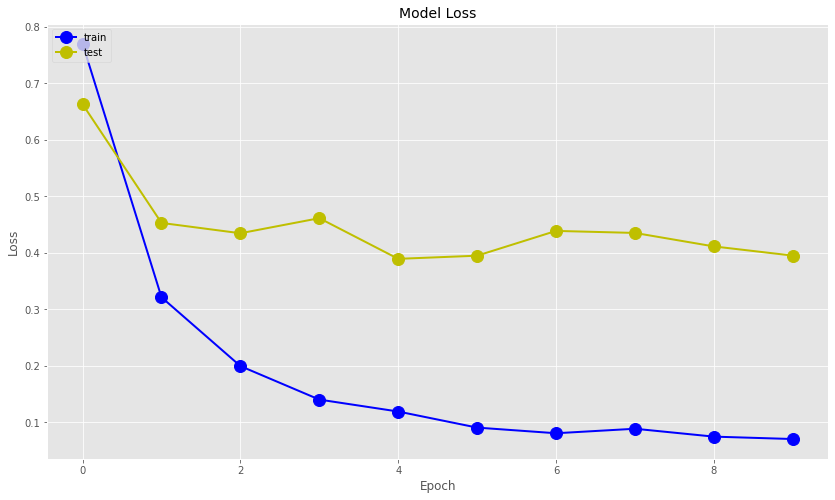

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 8s 196ms/step - loss: 0.3951 - accuracy: 0.8918
n Test_Accuracy:- 0.8917881846427917
confusion matrix
[[ 71   5   0   0   0   0   0   0   0   2   2   0   0]
 [  0  41   1   0   0   2   1   0   0   0   8   1   0]
 [  2   3 263   1   4   0   1   0   1   0   1   1   0]
 [  0   0   1 165   3   0   0   0   0   0   6   6   2]
 [  0   0   0   4 141   2   0   0   0   0   0   0   1]
 [  1   0   0   0   0  56   0   0   0   0   4   0   1]
 [  0   2   3   3   1   0  57   1   0   2   6   0   5]
 [  1   0   0   0   4   0   0  34   0   1   0   0   0]
 [  2   2   2   2   1   0   0   0  31   5   2   1   0]
 [  0   3   0   2   3   0   1   0   0  62   0   0   0]
 [  0   2   0   0   0   0   3   0   3   0  46   0   4]
 [  0   0   0   1   0   0   0   0   0   0   0 137   0]
 [  0   1   0   0   0   0   2   0   1   0   2   0  58]]


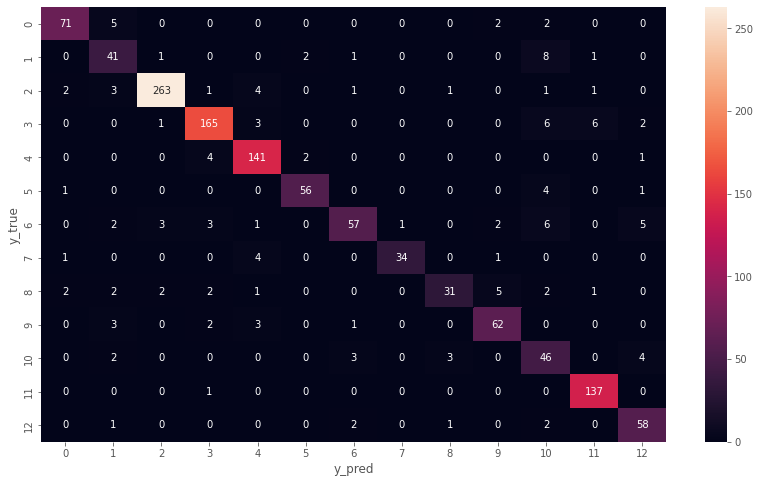

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.92      0.89      0.90        80
     10Pachy       0.69      0.76      0.73        54
     12Phyll       0.97      0.95      0.96       277
     14Macro       0.93      0.90      0.91       183
      1Pnoep       0.90      0.95      0.92       148
      2Malac       0.93      0.90      0.92        62
      3Malac       0.88      0.71      0.79        80
      4Anthi       0.97      0.85      0.91        40
      5Anthr       0.86      0.65      0.74        48
      6Corvu       0.86      0.87      0.87        71
      7Dryoc       0.60      0.79      0.68        58
      8Elanu       0.94      0.99      0.96       138
      9Ortho       0.82      0.91      0.86        64

    accuracy                           0.89      1303
   macro avg       0.87      0.86      0.86      1303
weighted avg       0.90      0.89      0.89      1303



In [ ]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9234650348690784


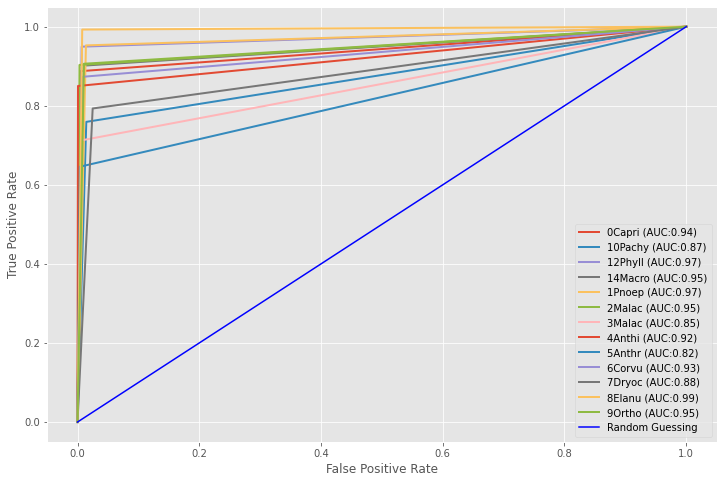

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)),linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9785111281657713

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1275

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8917881811204912

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1162

In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/m2_adam_1.hdf5')

In [ ]:
finalpreds = pd.DataFrame(y_pred)
#finalpreds.columns = sub_temp.columns
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/m2_adam_1.csv',index=False)